#INF2178 Final Submission
Research Question: How does gender and race shape the pattern of Strip Search under the influence of frequency of Booked?

#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from scipy.stats import ttest_ind #Used for T-test
import statsmodels.api as sm #Used for ANOVA + bibary and categorical variables
from statsmodels.formula.api import ols #Used for ANOVA + bibary and categorical variables
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin 
from pingouin import ancova
from math import sqrt
from statsmodels.stats.power import TTestIndPower

df2 = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

In [ ]:
#Convert Age into categorical numbers
df2['Age_group__at_arrest_'] = df2['Age_group__at_arrest_'].replace({'Aged 25 to 34 years': 30, 
                                     'Aged 35 to 44 years': 40,
                                     'Aged 18 to 24 years': 21,
                                     'Aged 45 to 54 years': 50,
                                     'Aged 55 to 64 years': 60,
                                     'Aged 65 and older': 65,
                                     'Aged 65 years and older': 65,
                                     'Aged 17 years and younger': 17,
                                     'Aged 17 years and under': 17,})

In [ ]:
# rename the Age attribute
df_new = df2.rename(columns={'Age_group__at_arrest_': 'Age'})
df_new

In [ ]:
#Reorganize the table
df3 = df_new.groupby(['Arrest_Year', 'PersonID', 'Sex', 'Perceived_Race'], as_index=False).agg({'StripSearch':'sum', 'Booked':'sum', 'Age':'max'})
df3.head(25)

In [ ]:
df3.dropna()

,Arrest_Year,PersonID,Sex,Perceived_Race,StripSearch,Booked,Age
0,2020,300000,M,East/Southeast Asian,0,0,40.0000
1,2020,300001,F,White,0,1,17.0000
2,2020,300002,M,White,0,0,40.0000
3,2020,300003,M,White,1,3,30.0000
4,2020,300004,M,Black,0,1,30.0000
...,...,...,...,...,...,...,...
45276,2021,337332,M,Unknown or Legacy,0,1,40.0000
45277,2021,337334,F,Latino,0,0,17.0000
45278,2021,337339,M,White,0,1,40.0000
45279,2021,337342,M,White,0,0,17.0000


In [ ]:
# drop duplicate values from the 'PersonID' column
df3 = df3[~df3.index.duplicated(keep='first')]
df3 = df3[df3['Sex'] != 'U']
df3.dropna(subset=['Sex'], inplace=True)
df3

,Arrest_Year,PersonID,Sex,Perceived_Race,StripSearch,Booked,Age
0,2020,300000,M,East/Southeast Asian,0,0,40.0000
1,2020,300001,F,White,0,1,17.0000
2,2020,300002,M,White,0,0,40.0000
3,2020,300003,M,White,1,3,30.0000
4,2020,300004,M,Black,0,1,30.0000
...,...,...,...,...,...,...,...
45276,2021,337332,M,Unknown or Legacy,0,1,40.0000
45277,2021,337334,F,Latino,0,0,17.0000
45278,2021,337339,M,White,0,1,40.0000
45279,2021,337342,M,White,0,0,17.0000


In [ ]:
#Convert Strip Search back to Dummy, people who get search account as 1, haven't have any search search get 0. 
df3['StripSearch'] = np.where(df3['StripSearch'] == 0, 0, 1)
df3

,Arrest_Year,PersonID,Sex,Perceived_Race,StripSearch,Booked,Age
0,2020,300000,M,East/Southeast Asian,0,0,40.0000
1,2020,300001,F,White,0,1,17.0000
2,2020,300002,M,White,0,0,40.0000
3,2020,300003,M,White,1,3,30.0000
4,2020,300004,M,Black,0,1,30.0000
...,...,...,...,...,...,...,...
45276,2021,337332,M,Unknown or Legacy,0,1,40.0000
45277,2021,337334,F,Latino,0,0,17.0000
45278,2021,337339,M,White,0,1,40.0000
45279,2021,337342,M,White,0,0,17.0000


In [ ]:
#Convert booked back to Dummy, people who get booked account as 1, haven't have any booked get 0.
df3['Booked'] = np.where(df3['Booked'] == 0, 0, 1)
df3

,Arrest_Year,PersonID,Sex,Perceived_Race,StripSearch,Booked,Age
0,2020,300000,M,East/Southeast Asian,0,0,40.0000
1,2020,300001,F,White,0,1,17.0000
2,2020,300002,M,White,0,0,40.0000
3,2020,300003,M,White,1,1,30.0000
4,2020,300004,M,Black,0,1,30.0000
...,...,...,...,...,...,...,...
45276,2021,337332,M,Unknown or Legacy,0,1,40.0000
45277,2021,337334,F,Latino,0,0,17.0000
45278,2021,337339,M,White,0,1,40.0000
45279,2021,337342,M,White,0,0,17.0000


In [ ]:
# converting Sex to binary data
df4 = pd.get_dummies(df3["Sex"])
print(df4)

       F  M
0      0  1
1      1  0
2      0  1
3      0  1
4      0  1
...   .. ..
45276  0  1
45277  1  0
45278  0  1
45279  0  1
45280  0  1

[45272 rows x 2 columns]


In [ ]:
#FInd out all the race category
# replacing values
df3['Perceived_Race'].replace(['East/Southeast Asian', 'White','Black','South Asian','Middle-Eastern','Unknown or Legacy','Latino','Indigenous'],
                        [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

In [ ]:
# converting Sex to binary data
df5 = pd.get_dummies(df3["Perceived_Race"])
print(df5)

       0  1  2  3  4  5  6  7
0      1  0  0  0  0  0  0  0
1      0  1  0  0  0  0  0  0
2      0  1  0  0  0  0  0  0
3      0  1  0  0  0  0  0  0
4      0  0  1  0  0  0  0  0
...   .. .. .. .. .. .. .. ..
45276  0  0  0  0  0  1  0  0
45277  0  0  0  0  0  0  1  0
45278  0  1  0  0  0  0  0  0
45279  0  1  0  0  0  0  0  0
45280  0  0  1  0  0  0  0  0

[45272 rows x 8 columns]


In [ ]:
#Combine all the dummies into original data
df3 = pd.concat([df3, df4, df5], axis=1)
df3

,Arrest_Year,PersonID,Sex,Perceived_Race,StripSearch,Booked,Age,F,M,0,1,2,3,4,5,6,7
0,2020,300000,M,0,0,0,40.0000,0,1,1,0,0,0,0,0,0,0
1,2020,300001,F,1,0,1,17.0000,1,0,0,1,0,0,0,0,0,0
2,2020,300002,M,1,0,0,40.0000,0,1,0,1,0,0,0,0,0,0
3,2020,300003,M,1,1,1,30.0000,0,1,0,1,0,0,0,0,0,0
4,2020,300004,M,2,0,1,30.0000,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45276,2021,337332,M,5,0,1,40.0000,0,1,0,0,0,0,0,1,0,0
45277,2021,337334,F,6,0,0,17.0000,1,0,0,0,0,0,0,0,1,0
45278,2021,337339,M,1,0,1,40.0000,0,1,0,1,0,0,0,0,0,0
45279,2021,337342,M,1,0,0,17.0000,0,1,0,1,0,0,0,0,0,0


In [ ]:
df3.drop(['M', 'Sex'], axis=1, inplace=True)
df3 = df3.rename(columns={'F': 'Sex'}) # male represented by 0m and female represented by 1
df3

,Arrest_Year,PersonID,Perceived_Race,StripSearch,Booked,Age,Sex,0,1,2,3,4,5,6,7
0,2020,300000,0,0,0,40.0000,0,1,0,0,0,0,0,0,0
1,2020,300001,1,0,1,17.0000,1,0,1,0,0,0,0,0,0
2,2020,300002,1,0,0,40.0000,0,0,1,0,0,0,0,0,0
3,2020,300003,1,1,1,30.0000,0,0,1,0,0,0,0,0,0
4,2020,300004,2,0,1,30.0000,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45276,2021,337332,5,0,1,40.0000,0,0,0,0,0,0,1,0,0
45277,2021,337334,6,0,0,17.0000,1,0,0,0,0,0,0,1,0
45278,2021,337339,1,0,1,40.0000,0,0,1,0,0,0,0,0,0
45279,2021,337342,1,0,0,17.0000,0,0,1,0,0,0,0,0,0


In [ ]:
#rename columns
df3.rename(columns={'East/Southeast Asian': 'EastSoutheast_Asian','South Asian':'South_Asian', 'Unknown or Legacy':'Unknown_or_Legacy', 'Middle-Eastern':'MiddleEastern'},inplace=True)
print(df3.columns)

ANCOVA data cleaning include turning y(stripsearch) and covariate(booked) into continuous variables. 

In [ ]:
df7 = df_new.groupby(['Arrest_Year', 'PersonID', 'Sex', 'Perceived_Race'],as_index=False).agg({'StripSearch':'sum', 'Booked':'sum', 'Age':'max'})
df7.head(25)

,Arrest_Year,PersonID,Sex,Perceived_Race,StripSearch,Booked,Age
0,2020,300000,M,East/Southeast Asian,0,0,40.0000
1,2020,300001,F,White,0,1,17.0000
2,2020,300002,M,White,0,0,40.0000
3,2020,300003,M,White,1,3,30.0000
4,2020,300004,M,Black,0,1,30.0000
5,2020,300005,M,South Asian,0,0,50.0000
6,2020,300006,M,Middle-Eastern,0,1,60.0000
7,2020,300007,M,South Asian,1,3,30.0000
8,2020,300008,M,Black,0,1,30.0000
9,2020,300009,M,White,0,0,40.0000


In [ ]:
df7.dropna

<bound method DataFrame.dropna of        Arrest_Year  PersonID Sex        Perceived_Race  StripSearch  Booked  \
0             2020    300000   M  East/Southeast Asian            0       0   
1             2020    300001   F                 White            0       1   
2             2020    300002   M                 White            0       0   
3             2020    300003   M                 White            1       3   
4             2020    300004   M                 Black            0       1   
...            ...       ...  ..                   ...          ...     ...   
45276         2021    337332   M     Unknown or Legacy            0       1   
45277         2021    337334   F                Latino            0       0   
45278         2021    337339   M                 White            0       1   
45279         2021    337342   M                 White            0       0   
45280         2021    337345   M                 Black            0       0   

          Age  
0

#Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

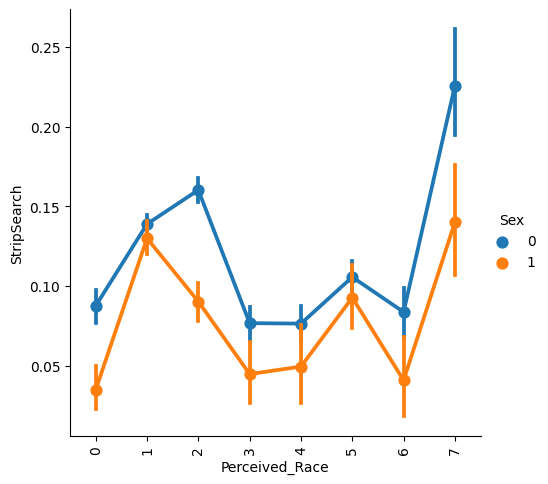

In [ ]:
# Create interaction plot
sns.catplot(x='Perceived_Race', y='StripSearch', hue='Sex', kind='point', data=df3)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'East/Southeast Asian'),
  Text(2, 0, 'Indigenous'),
  Text(3, 0, 'Latino'),
  Text(4, 0, 'Middle-Eastern'),
  Text(5, 0, 'South Asian'),
  Text(6, 0, 'Unknown or Legacy'),
  Text(7, 0, 'White')])

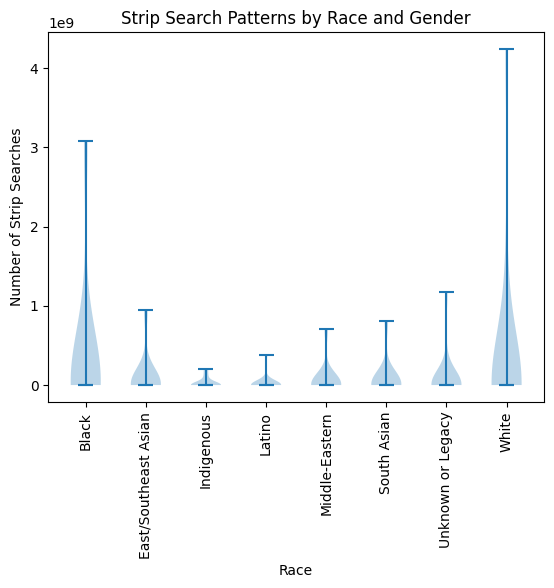

In [ ]:
# create violin plot
# Group the data by race and gender
df3_1 = df7.groupby(['Perceived_Race', 'Sex']).sum()
# Reshape the data to be in the correct format for plotting
df3_2 = df3_1.unstack(level=-1)
# Create a violin plot
fig, ax = plt.subplots()
ax.violinplot(dataset=[df3_2.loc[race].dropna() for race in df3_2.index],
              positions=range(len(df3_2)),
              showmeans=False,
              showmedians=True)

# Add labels and title
ax.set_xticks(range(len(df3_2)))
ax.set_xticklabels(df3_2.index)
ax.set_xlabel('Race')
ax.set_ylabel('Number of Strip Searches')
ax.set_title('Strip Search Patterns by Race and Gender')
# set the x-axis label rotation angle to 45 degrees
plt.xticks(rotation=90)


In [ ]:
df7 = df7.dropna()
df7 = df7[df7['Sex'] != 'U']
fig_hist = px.histogram(data_frame = df7, x = 'Perceived_Race', y = 'StripSearch', facet_row= 'Sex', facet_col='Booked')
fig_hist

Text(0.5, 1.0, 'Sex-Age associate with Perceived Race')

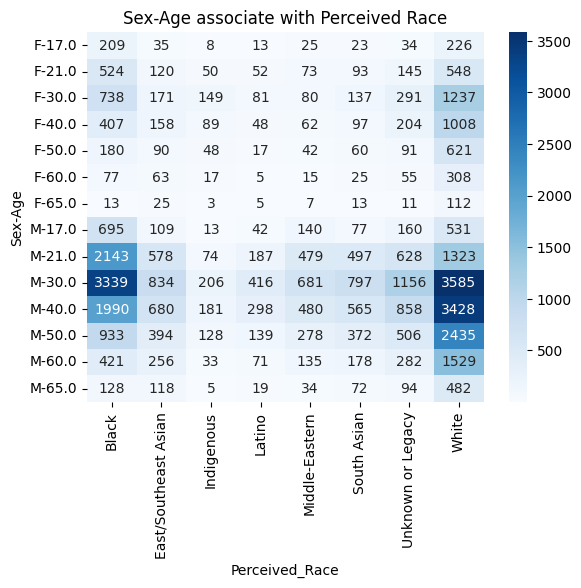

In [ ]:
pivot_table = df7.pivot_table(index=['Sex', 'Age'], columns='Perceived_Race', values='StripSearch', aggfunc='count')
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g')
plt.title('Sex-Age associate with Perceived Race')

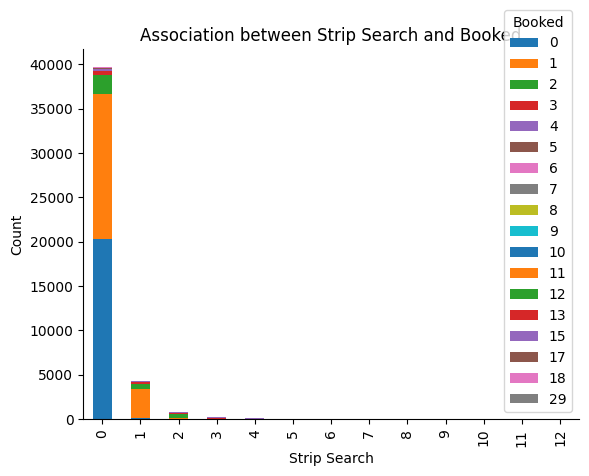

In [ ]:
#Find the association between StripSearch and Booked
# Create a contingency table
SS_Booked = pd.crosstab(df7['StripSearch'], df7['Booked'])

# Visualize the contingency table using a stacked bar plot
ax = SS_Booked.plot(kind='bar', stacked=True)
ax.set_xlabel('Strip Search')
ax.set_ylabel('Count')
ax.set_title('Association between Strip Search and Booked')
sns.despine()

#T-test


T-Test: Is there a significant difference in the mean age at the time of arrest between males and females?

In [ ]:
group1=df7[df7['Sex']=='M']['StripSearch']
group2=df7[df7['Sex']=='F']['StripSearch']

group1_mean = np.mean(group1)
group1_sd = np.std(group1)
group1_size = len(group1)
group2_mean = np.mean(group2)
group2_sd = np.std(group2)
group2_size = len(group2)

t_statistic, p_value = ttest_ind(group1, group2)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 1: Mean = {}, SD = {}, Size = {}'.format(group1_mean, group1_sd, group1_size))
print('Group 2: Mean = {}, SD = {}, Size = {}'.format(group2_mean, group2_sd, group2_size))

T-statistic: 5.658758301134512
P-value: 1.5339107517290873e-08
Group 1: Mean = 0.17989841550267763, SD = 0.585074531512654, Size = 36226
Group 2: Mean = 0.14183064337828874, SD = 0.518189086871773, Size = 9046


T-Test: Is there a significant difference in the mean value of number of strip search between White community and black community?

In [ ]:
group3=df7[df7['Perceived_Race']=='White']['StripSearch']
group4=df7[df7['Perceived_Race']=='Black']['StripSearch']

group3_mean = np.mean(group3)
group3_sd = np.std(group3)
group3_size = len(group3)
group4_mean = np.mean(group4)
group4_sd = np.std(group4)
group4_size = len(group4)

t_statistic, p_value = ttest_ind(group3, group4)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 3: Mean = {}, SD = {}, Size = {}'.format(group3_mean, group3_sd, group3_size))
print('Group 4: Mean = {}, SD = {}, Size = {}'.format(group4_mean, group4_sd, group4_size))

T-statistic: -0.1408151970282043
P-value: 0.888016908897232
Group 3: Mean = 0.20510755780513057, SD = 0.6533099563370032, Size = 17386
Group 4: Mean = 0.20618382041507835, SD = 0.622066930889707, Size = 11805


T-Test: Is there a significant difference in the mean value of number of strip search between White community and Indigenous community?

In [ ]:
group5=df7[df7['Perceived_Race']=='White']['StripSearch']
group6=df7[df7['Perceived_Race']=='Indigenous']['StripSearch']

group5_mean = np.mean(group5)
group5_sd = np.std(group5)
group5_size = len(group5)
group6_mean = np.mean(group6)
group6_sd = np.std(group6)
group6_size = len(group6)

t_statistic, p_value = ttest_ind(group5, group6)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 5: Mean = {}, SD = {}, Size = {}'.format(group5_mean, group5_sd, group5_size))
print('Group 6: Mean = {}, SD = {}, Size = {}'.format(group6_mean, group6_sd, group6_size))

T-statistic: -4.589234250970119
P-value: 4.478154490134632e-06
Group 5: Mean = 0.20510755780513057, SD = 0.6533099563370032, Size = 17386
Group 6: Mean = 0.30417495029821073, SD = 0.8512197219978161, Size = 1006


T-Test: Is there a significant difference in the mean value of number of strip search between Black community and South Asian community?

In [ ]:
group9=df7[df7['Perceived_Race']=='Black']['StripSearch']
group10=df7[df7['Perceived_Race']=='South Asian']['StripSearch']

group9_mean = np.mean(group9)
group9_sd = np.std(group9)
group9_size = len(group9)
group10_mean = np.mean(group10)
group10_sd = np.std(group10)
group10_size = len(group10)

t_statistic, p_value = ttest_ind(group9, group10)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
print('Group 9: Mean = {}, SD = {}, Size = {}'.format(group9_mean, group9_sd, group9_size))
print('Group 10: Mean = {}, SD = {}, Size = {}'.format(group10_mean, group10_sd, group10_size))

T-statistic: 10.258172891214757
P-value: 1.3144441219738569e-24
Group 9: Mean = 0.20618382041507835, SD = 0.622066930889707, Size = 11805
Group 10: Mean = 0.0854956753160346, SD = 0.33780809423526936, Size = 3006


#Power Test

In [ ]:
#find the power using effect size, siginficant value, and sample size 393
#ratio =1 means the control groups and treatment group are the same. 
#obs 1 in the solve_power function is only the number of observations in one sample group. 
#nobs 2 is thus the number of observations in the second sample group. And ratio*nobs2=nobs1.
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size = 0.2, alpha = 0.05, nobs1 = 393, ratio = 1, alternative = 'two-sided')
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.8


In [ ]:
#Significance Level
# Calculate power
alpha = smp.TTestIndPower().solve_power(effect_size = 0.5, power = 0.8, nobs1 = 64, ratio = 1, alternative = 'two-sided')
# Print results
print('The significance level for the hypothesis testing is', round(alpha, 2))

The significance level for the hypothesis testing is 0.05


In [ ]:
from statsmodels.stats.power import TTestPower
power = TTestPower()
n_test = power.solve_power(nobs=281, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


In [ ]:
import statsmodels.stats.power as smp
import scipy.stats
# Visualization
import matplotlib.pyplot as plt

In [ ]:
#Statistical power analysis - Effect size
# Input parameters
mu1 = 0.17 # Group 1 average value
mu2 = 0.75 # Group 2 average value
s1 = 0.57 # Group 1 standard deviation
s2 = 0.98 # Group 2 standard deviation
n1 = 45250 # Group 1 sample size
n2 = 45250 # Group 2 sample size
# Calculate the pooled standard deviation
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
# Calculate the Cohen's d effect size
d = (mu1 - mu2) / s
print(f'Effect size: {d}')
# factors for power analysis
alpha = 0.05
power = 0.8
# Print results
obj = smp.TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power,
     ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))
print('The effect size for the hypothesis testing is', round(d, 2))

Effect size: -0.6588357277265952
Sample size/Number needed in each group: 37.150
The effect size for the hypothesis testing is -0.66


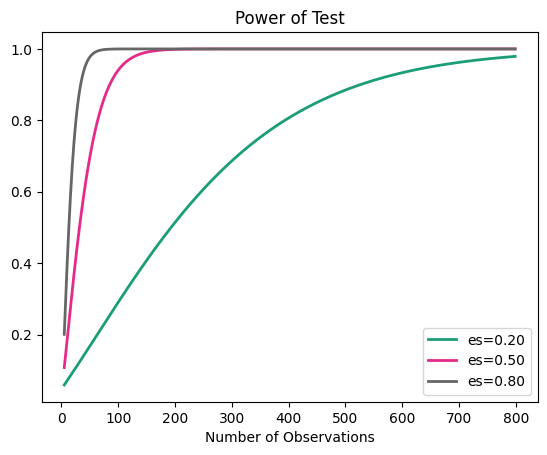

In [ ]:
  effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 800))
analysis = TTestIndPower() 
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

#ANCOVA



The ANCOVA allows us the find significance between race and strip, search we would like to learn further about what race have the highest rate of participation in strip search. To make our research question, we want to control booked as covariate, such that we can remove the influence of booked on pattern of strip search. 

y should be continous, x should include continuous and categorical

y = Strip Search, x = Race, Cov = Booked

In [ ]:
ancova(data=df7, dv='StripSearch', covar='Booked', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,24.349709,7,14.608952,3.873498e-19,0.002255
1,Booked,3931.717392,1,16512.226289,0.000000e+00,0.267352
2,Residual,10774.453358,45250,NaN,NaN,NaN


Poc host: tells us which group have particular representitive. 

In [ ]:
#perform Tukey's Test for multiple comparisons
import statsmodels.stats.multicomp as mc
mc_model = mc.MultiComparison(df7['StripSearch'], df7['Perceived_Race'])
tukey_result = mc_model.tukeyhsd()
print(tukey_result)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1124    0.0 -0.1452 -0.0796   True
               Black           Indigenous   0.0985    0.0  0.0417  0.1553   True
               Black               Latino  -0.1116    0.0 -0.1606 -0.0627   True
               Black       Middle-Eastern  -0.1162    0.0 -0.1541 -0.0784   True
               Black          South Asian  -0.1208    0.0 -0.1561 -0.0855   True
               Black    Unknown or Legacy  -0.0877    0.0 -0.1179 -0.0575   True
               Black                White  -0.0011    1.0 -0.0217  0.0195  False
East/Southeast Asian           Indigenous   0.2109    0.0  0.1493  0.2725   True
East/Southeast Asian               Latino   0.0008    1.0 -0.0537  0.0552  False
East/Southeast Asian       M

#Logistic Regression

The logistic regression allows us to examine the association of race perceived race and gender with respect to pattern of Strip Search. 

In [ ]:
df7["SS"]= df7["StripSearch"].apply(lambda x: 1 if x > 1 else 0)
df7['Sex'] = df7['Sex'].replace({'M': 1, 'F': 0})
df7 = df7.drop(df7[df7['Sex'] == 'U'].index)
X = df7[['Perceived_Race','Sex']].copy()
Y = df7['SS']
print(df7)

       Arrest_Year  PersonID Sex        Perceived_Race  StripSearch  Booked  \
0             2020    300000   1  East/Southeast Asian            0       0   
1             2020    300001   0                 White            0       1   
2             2020    300002   1                 White            0       0   
3             2020    300003   1                 White            1       3   
4             2020    300004   1                 Black            0       1   
...            ...       ...  ..                   ...          ...     ...   
45276         2021    337332   1     Unknown or Legacy            0       1   
45277         2021    337334   0                Latino            0       0   
45278         2021    337339   1                 White            0       1   
45279         2021    337342   1                 White            0       0   
45280         2021    337345   1                 Black            0       0   

          Age  SS  
0     40.0000   0  
1     17.00

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=101)

In [ ]:
import statsmodels.api as sm
all_colums = ' + '.join(X)
formulal = "SS~" +  all_colums
print ("formulal:", formulal, "\n")

formulal: SS~Perceived_Race + Sex 



In [ ]:
df7 = df7.dropna()
df7['Age'] = df7['Age'].astype(int)
print(df7.dtypes)

Arrest_Year        int64
PersonID           int64
Sex               object
Perceived_Race    object
StripSearch        int64
Booked             int64
Age                int64
SS                 int64
dtype: object


<ipython-input-118-15968c624420>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Age'] = df7['Age'].astype(int)


In [ ]:
import statsmodels.formula.api as sm
traindata = pd.concat([X_train,Y_train], axis = 1)
log_reg_1 = sm.logit(formulal, data=traindata).fit()
log_reg_1.summary()

Optimization terminated successfully.
         Current function value: 0.123257
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     SS   No. Observations:                36217
Model:                          Logit   Df Residuals:                    36208
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                 0.02515
Time:                        19:18:14   Log-Likelihood:                -4464.0
converged:                       True   LL-Null:                       -4579.2
Covariance Type:            nonrobust   LLR p-value:                 2.565e-45
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.6519      0.094    -38.885      0.000      -3.836      -3.468
Perceived_Race[T.East/Southeast Asian]    -0.9310      0.173     -5.378      0.000      -1.270      -0.592
Perceived_Race[T.Indigenous]               0.4579      0.173      2.654      0.008       0.120       0.796
Perceived_Race[T.Latino]                  -1.3309      0.323     -4.123      0.000      -1.964      -0.698
Perceived_Race[T.Middle-Eastern]          -1.0288      0.209     -4.915      0.000      -1.439      -0.619
Perceived_Race[T.South Asian]             -1.3147      0.222     -5.928      0.000      -1.749      -0.880
Perceived_Race[T.Unknown or Legacy]       -1.0810      0.167     -6.463      0.000      -1.409      -0.753
Perceived_Race[T.White]                    0.1308      0.073      1.790      0.074      -0.012       0.274
Sex[T.1]                                   0.3257      0.087      3.762      0.000       0.156       0.495
==========================================================================================================
"""

In [ ]:
odds_ratios = np.exp(log_reg_1.params)
print('Odds Ratios:')
print(odds_ratios)

Odds Ratios:
Intercept                                0.0259
Perceived_Race[T.East/Southeast Asian]   0.3942
Perceived_Race[T.Indigenous]             1.5808
Perceived_Race[T.Latino]                 0.2642
Perceived_Race[T.Middle-Eastern]         0.3574
Perceived_Race[T.South Asian]            0.2686
Perceived_Race[T.Unknown or Legacy]      0.3393
Perceived_Race[T.White]                  1.1397
Sex[T.1]                                 1.3851
dtype: float64


Prediction Interval

In [ ]:
from scipy import stats
# Create dummy variables for categorical features
gender_dummy = pd.get_dummies(df3['Sex'], drop_first=True)
race_dummy = pd.get_dummies(df3['Perceived_Race'], drop_first=True)
# Concatenate the dummy variables and add a constant term
X = sm.add_constant(pd.concat([gender_dummy, race_dummy], axis=1))
# Calculate the predicted probabilities
pred_probs = result.predict(X)
# Calculate the standard errors for the predicted probabilities
cov_matrix = result.cov_params()
X_design = X.values
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov_matrix), g.T)) for g in X_design])
# Compute the confidence interval (e.g., 95% confidence interval)
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)
lower_bound = pred_probs - critical_value * std_errors
upper_bound = pred_probs + critical_value * std_errors
# Clip the prediction interval to the [0, 1] range
lower_bound = np.clip(lower_bound, 0, 1)
upper_bound = np.clip(upper_bound, 0, 1)
# Combine the lower and upper bounds into a DataFrame
prediction_interval = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})
print(prediction_interval.head(15))

    Lower Bound  Upper Bound
0        0.0000       0.1887
1        0.0000       0.3108
2        0.0000       0.3332
3        0.0000       0.3332
4        0.0000       0.3406
5        0.0000       0.5054
6        0.0000       0.3938
7        0.0000       0.5054
8        0.0000       0.3406
9        0.0000       0.3332
10       0.0000       0.3332
11       0.0000       0.1887
12       0.0000       0.3705
13       0.0000       0.1373
14       0.0000       0.3108


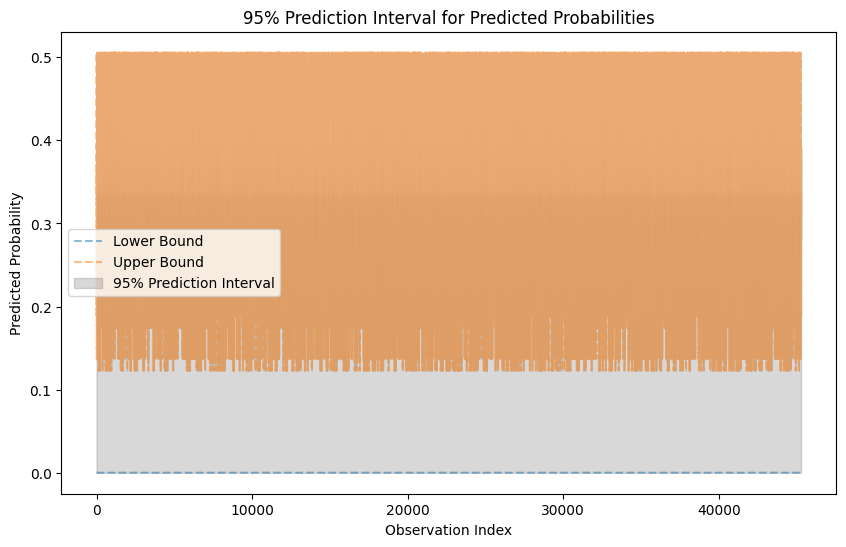

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(prediction_interval['Lower Bound'], label='Lower Bound', linestyle='--', alpha=0.5)
plt.plot(prediction_interval['Upper Bound'], label='Upper Bound', linestyle='--', alpha=0.5)
plt.fill_between(prediction_interval.index, prediction_interval['Lower Bound'], prediction_interval['Upper Bound'], color='gray', alpha=0.3, label='95% Prediction Interval')
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.legend()
plt.title('95% Prediction Interval for Predicted Probabilities')
plt.show()

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)})
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None #show all columns in data

gender_dummy = pd.get_dummies(df7['Sex'], drop_first=True)
race_dummy = pd.get_dummies(df7['Perceived_Race'], drop_first=True)
X = sm.add_constant(pd.concat([gender_dummy, race_dummy], axis=1))
logit_model = sm.Logit(df7['SS'], X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.125686
         Iterations 9


<ipython-input-142-c56c12087d4e>:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  gender_dummy = pd.get_dummies(df7['Sex'], drop_first=True)


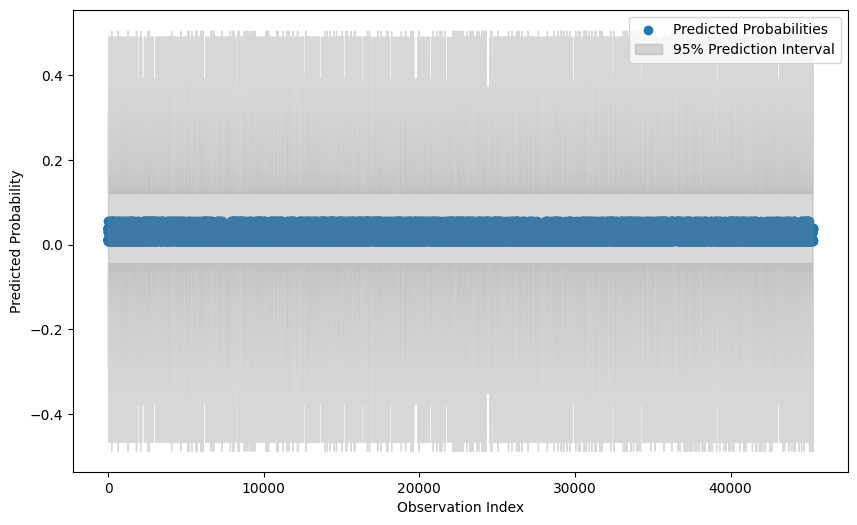

In [ ]:
from scipy import stats
# Calculate the predicted probabilities
pred_probs = result.predict(X)

# Calculate the standard errors for the predicted probabilities
cov_matrix = result.cov_params()
X_design = X.values
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov_matrix), g.T)) for g in X_design])

# Compute the confidence interval (e.g., 95% confidence interval)
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)
lower_bound = pred_probs - critical_value * std_errors
upper_bound = pred_probs + critical_value * std_errors

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X)), pred_probs, label='Predicted Probabilities')
plt.fill_between(range(len(X)), lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Prediction Interval')
plt.xlabel('Observation Index')
plt.ylabel('Predicted Probability')
plt.legend()
plt.show()